**Instalar Paquetes**

In [ ]:
!pip install openpyxl

**Importaciones**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from google.colab import files

**Carga de Excel**

In [ ]:
ventas_df = pd.read_excel('ventas.xlsx', sheet_name='RegistroVentas')
productos_df = pd.read_excel('ventas.xlsx', sheet_name='Productos')
tiendas_df = pd.read_excel('ventas.xlsx', sheet_name='Tiendas')


**Estructura de datos**

In [ ]:
print('Estructura de Datos')
print(f'Registro de Ventas:  {ventas_df.shape} filas x columnas')
print(f'Productos:  {productos_df.shape} filas x columnas')
print(f'Tiendas:  {ventas_df.shape} filas x columnas')

Estructura de Datos
Registro de Ventas:  (4761, 6) filas x columnas
Productos:  (8, 3) filas x columnas
Tiendas:  (4761, 6) filas x columnas


**Limpieza y transformación de Datos**

In [ ]:
# Paso 3: Limpieza y transformación de datos
# Convertir fecha y calcular total
ventas_df['Fecha_ Pedido'] = pd.to_datetime(ventas_df['Fecha_ Pedido'], dayfirst=True)
ventas_df['Total_Venta'] = ventas_df['Qtde'] *ventas_df['Precio_Unitario']
# Unir todos los datos
df_completo = (
ventas_df.merge(productos_df, left_on='id_producto',right_on='id_produto', how='left')
.merge(tiendas_df, left_on='Cod_Tienda',right_on='codigo_Tienda', how='left')
)




**Análisis básico**


🔍 Análisis rápido:
Período de ventas: 2023-01-01 a 2023-12-31
Total vendido: R$ 72,861,269.76
Productos únicos vendidos:8
Tiendas con ventas:8


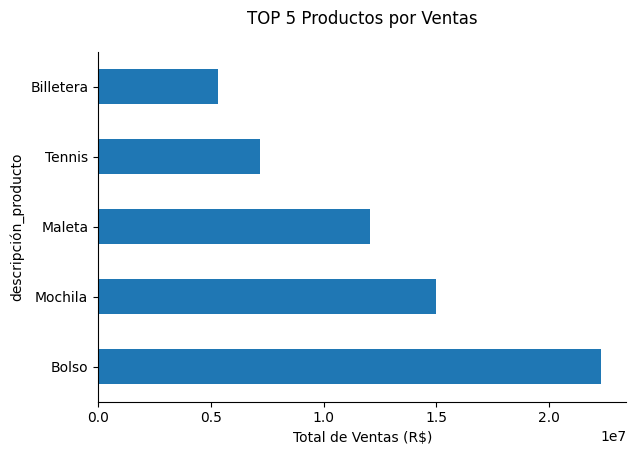

In [ ]:
# Paso 4: Análisis básico
print("\n🔍 Análisis rápido:")
print(f"Período de ventas: {ventas_df['Fecha_ Pedido'].min().date()} a {ventas_df['Fecha_ Pedido'].max().date()}")
print(f"Total vendido: R$ {df_completo['Total_Venta'].sum():,.2f}")
print(f"Productos únicos vendidos:{df_completo['descripción_producto'].nunique()}")
print(f"Tiendas con ventas:{df_completo['nombre_Tienda'].nunique()}")
# Paso 5: Visualizaciones (mejoradas)
plt.figure(figsize=(15, 10))
# Gráfico 1: Ventas por producto (TOP 5)
plt.subplot(2, 2, 1)
top_productos =df_completo.groupby('descripción_producto')['Total_Venta'].sum().nlargest(5)
top_productos.plot(kind='barh', color='#1f77b4')
plt.title('TOP 5 Productos por Ventas', pad=20)
plt.xlabel('Total de Ventas (R$)')
sns.despine()

**Ventas por Estado**

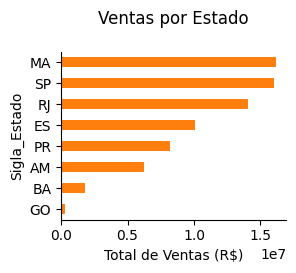

In [ ]:
# Gráfico 2: Ventas por estado
plt.subplot(2, 2, 2)
ventas_estado =df_completo.groupby('Sigla_Estado')['Total_Venta'].sum().sort_values()
ventas_estado.plot(kind='barh', color='#ff7f0e')
plt.title('Ventas por Estado', pad=20)
plt.xlabel('Total de Ventas (R$)')
sns.despine()


**Evolución mensual**

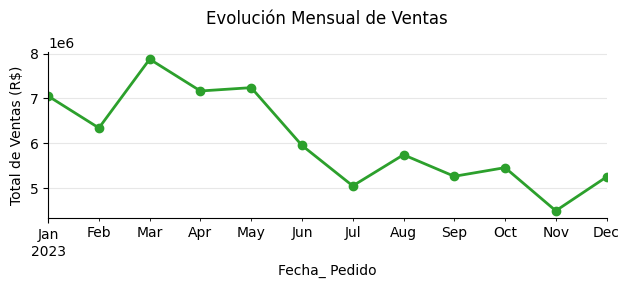

In [ ]:
plt.subplot(2, 1, 2)
ventas_mensuales = df_completo.set_index('Fecha_ Pedido').resample('ME')['Total_Venta'].sum()
ventas_mensuales.plot(marker='o', linestyle='-', color='#2ca02c',
linewidth=2)
plt.title('Evolución Mensual de Ventas', pad=20)
plt.ylabel('Total de Ventas (R$)')
plt.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

**Tabla dinámica: Análisis Básico**

In [ ]:
print("\n📌 Resumen por Producto y Estado:")
resumen = pd.pivot_table(df_completo,
values='Total_Venta',
index='descripción_producto',
columns='Sigla_Estado',
aggfunc='sum',
margins=True,
margins_name='TOTAL')
display(resumen.style.background_gradient(cmap='Blues').format('R${:.2f}'))
# Paso 6: Exportar resultados
df_completo.to_excel('ventas_analizadas.xlsx', index=False)
files.download('ventas_analizadas.xlsx')
print("\n✅ Análisis completado! El archivo 'ventas_analizadas.xlsx'se ha descargado.")


📌 Resumen por Producto y Estado:


Sigla_Estado,AM,BA,ES,GO,MA,PR,RJ,SP,TOTAL
descripción_producto,,,,,,,,,
Audifinos,R$317364.00,R$136104.00,R$567948.00,R$20670.00,R$782121.00,R$424848.00,R$738396.00,R$853671.00,R$3841122.00
Billetera,R$427980.00,R$165480.00,R$691110.00,R$11550.00,R$1055880.00,R$616560.00,R$1154370.00,R$1200780.00,R$5323710.00
Bolso,R$1867131.00,R$486513.00,R$2982015.00,R$87912.00,R$4471524.00,R$2539458.00,R$4482513.00,R$5394600.00,R$22311666.00
Botella,R$253512.50,R$67643.10,R$340840.10,R$16105.50,R$1433866.70,R$216052.30,R$644100.70,R$600198.30,R$3572319.20
Gorra,R$331961.38,R$105770.43,R$432580.13,R$7244.55,R$847773.34,R$424852.61,R$622709.32,R$778547.64,R$3551439.40
Maleta,R$938477.20,R$321478.36,R$1826536.21,R$27954.64,R$2338205.96,R$1354801.66,R$2397110.38,R$2870342.50,R$12074906.91
Mochila,R$1473361.65,R$285838.47,R$2378201.31,R$39121.38,R$3359390.76,R$1966164.84,R$2645741.07,R$2839455.00,R$14987274.48
Tennis,R$639419.43,R$268319.22,R$841139.13,R$74604.27,R$1860944.28,R$682965.27,R$1378417.95,R$1453022.22,R$7198831.77
TOTAL,R$6249207.16,R$1837146.58,R$10060369.88,R$285162.34,R$16149706.04,R$8225702.68,R$14063358.42,R$15990616.66,R$72861269.76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Análisis completado! El archivo 'ventas_analizadas.xlsx'se ha descargado.
